# What is Stock Exchange

Stock Market is a place where buying and selling of shares happen publicly listed companies. Stock exchange is a mediator that allows buying and selling of shares.

## Importance of Stock Market

* Helps companies to raise capital
* Helps create personal wealth
* Serves as an indicator of the state of the economy
* Helps to increase investment

# Stock Market Prediction

Stock Market Prediction helps us to determine the future value of the company stock and other financial instruments traded on an exchange.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
tesla = pd.read_csv('tesla.csv')

In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [4]:
tesla['Date'] = tesla['Date'].apply(lambda x: pd.to_datetime(x, format="%d-%m-%Y"))

In [5]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2193 non-null   datetime64[ns]
 1   Open       2193 non-null   float64       
 2   High       2193 non-null   float64       
 3   Low        2193 non-null   float64       
 4   Close      2193 non-null   float64       
 5   Adj Close  2193 non-null   float64       
 6   Volume     2193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.1 KB


In [7]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max()-tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total Days = 3181 days


In [8]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<AxesSubplot:>

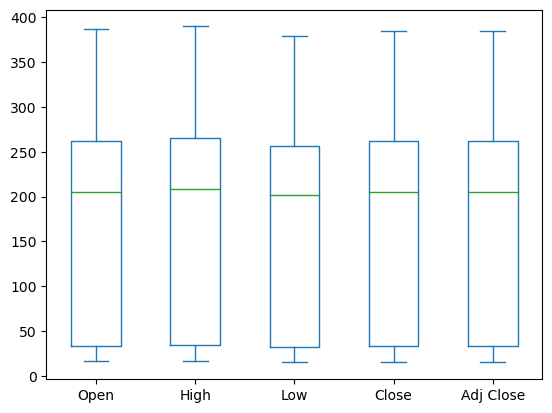

In [9]:
tesla[['Open','High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

<AxesSubplot:title={'center':'Tesla Stock across the years'}, xlabel='Years', ylabel='Closing Price'>

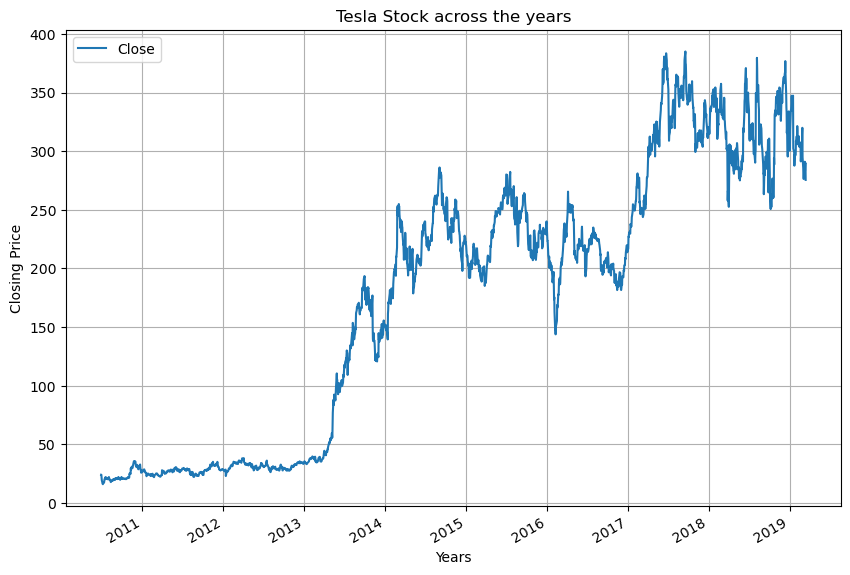

In [10]:
tesla.plot(x='Date', y='Close', title='Tesla Stock across the years', xlabel='Years', ylabel='Closing Price', figsize=(10,7), grid=True)

In [11]:
# Building the regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [13]:
#Feature Scaling
scaler = StandardScaler().fit_transform(X_train)

In [14]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
Y_pred = lm.predict(X_test)

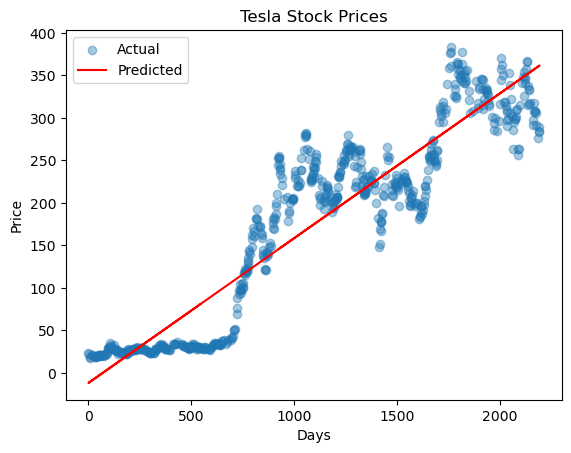

In [16]:
plt.scatter(X_test,Y_test,label='Actual',alpha=0.4)
plt.plot(X_test,Y_pred,color='red',label='Predicted')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Tesla Stock Prices')
plt.legend()
plt.show()

In [17]:
# Evaluation

r2_score(Y_test,Y_pred)

0.8610649253244574